In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Nikhil\\DS\\Assignments\\Forcasting\\CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


<AxesSubplot:>

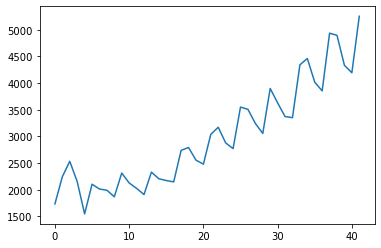

In [5]:
data.Sales.plot()

<AxesSubplot:ylabel='Frequency'>

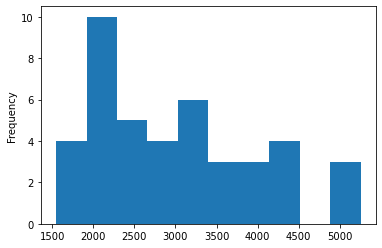

In [6]:
data.Sales.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

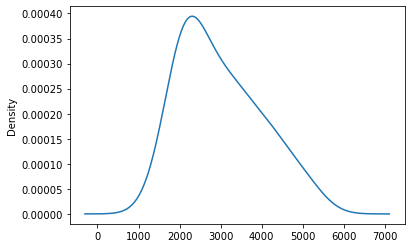

In [7]:
data.Sales.plot(kind='kde')

In [8]:
data['Quarters']=0
data['Year']=0
for i in range(42):
    p=data['Quarter'][i]
    data['Quarters'][i]=p[0:2]
    data['Year'][i]=p[3:5]    
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22492\3515300595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarters'][i]=p[0:2]
C:\Users\HP\AppData\Local\Temp\ipykernel_22492\3515300595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'][i]=p[3:5]


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

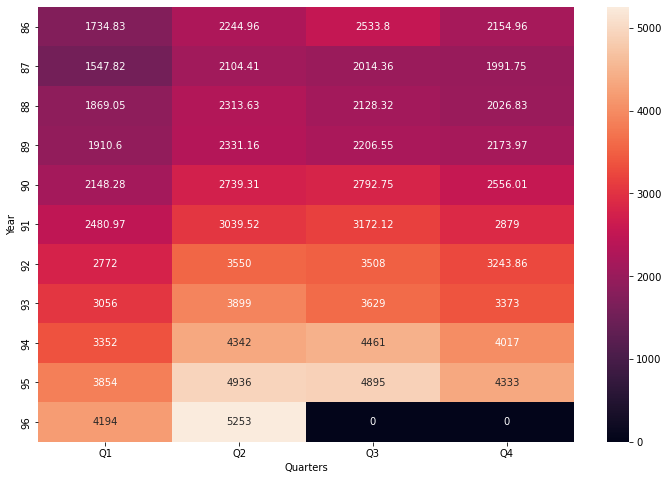

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='Year', ylabel='Sales'>

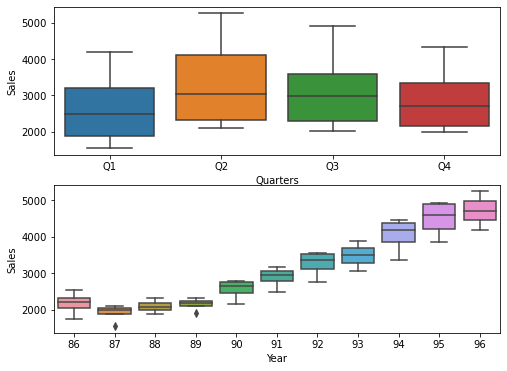

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

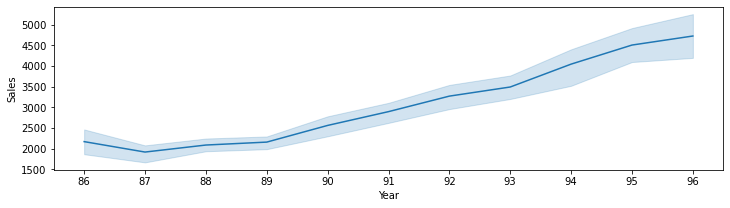

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=data)

# Decomposition

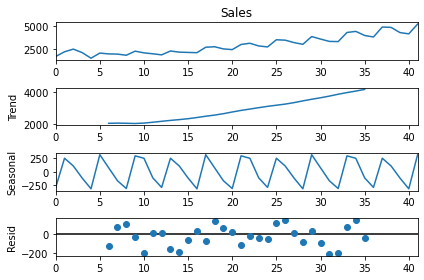

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

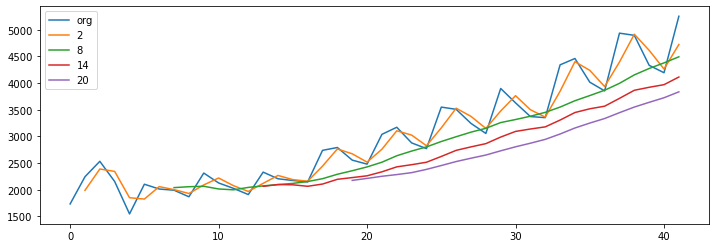

In [13]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# ACF and PACF

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


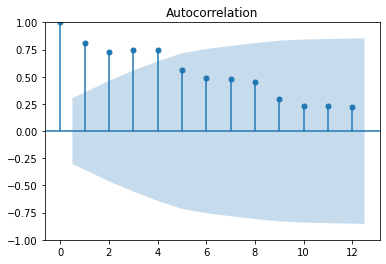

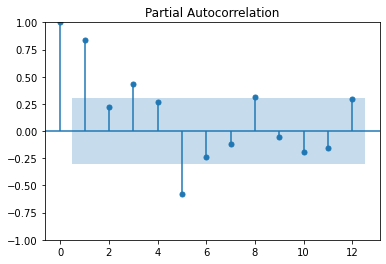

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [15]:
data['t'] = range(1, len(data) + 1)

In [16]:
data['log_Sales'] = np.log2(data['Sales'])

In [17]:
data['t_square'] = (data['t'])*(data['t'])

In [18]:
data = pd.get_dummies(data, columns=['Quarters'])

In [19]:
data

,Quarter,Sales,Year,t,log_Sales,t_square,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,1,10.760576,1,1,0,0,0
1,Q2_86,2244.960999,86,2,11.132475,4,0,1,0,0
2,Q3_86,2533.804993,86,3,11.307090,9,0,0,1,0
3,Q4_86,2154.962997,86,4,11.073447,16,0,0,0,1
4,Q1_87,1547.818996,87,5,10.596021,25,1,0,0,0
5,Q2_87,2104.411995,87,6,11.039201,36,0,1,0,0
6,Q3_87,2014.362999,87,7,10.976108,49,0,0,1,0
7,Q4_87,1991.746998,87,8,10.959819,64,0,0,0,1
8,Q1_88,1869.049999,88,9,10.868089,81,1,0,0,0
9,Q2_88,2313.631996,88,10,11.175944,100,0,1,0,0


# Splitting data into training and validation part

In [20]:
Train = data.head(78)
Test = data.tail(18)

In [21]:
Test

,Quarter,Sales,Year,t,log_Sales,t_square,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
24,Q1_92,2772.000000,92,25,11.436712,625,1,0,0,0
25,Q2_92,3550.000000,92,26,11.793603,676,0,1,0,0
26,Q3_92,3508.000000,92,27,11.776433,729,0,0,1,0
27,Q4_92,3243.859993,92,28,11.663496,784,0,0,0,1
28,Q1_93,3056.000000,93,29,11.577429,841,1,0,0,0
29,Q2_93,3899.000000,93,30,11.928888,900,0,1,0,0
30,Q3_93,3629.000000,93,31,11.825356,961,0,0,1,0
31,Q4_93,3373.000000,93,32,11.719817,1024,0,0,0,1
32,Q1_94,3352.000000,94,33,11.710806,1089,1,0,0,0
33,Q2_94,4342.000000,94,34,12.084144,1156,0,1,0,0


# Performing the data driven methods

In [22]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

414.2799074155775

In [23]:
#Exponential

Exp = smf.ols('log_Sales~t',data=data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

147495.19193000812

In [24]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=data).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

373.17889816647556

In [25]:
#Additive seasonality 

add_sea = smf.ols('Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=data).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1087.5685608617212

In [26]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square',data=data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

373.17889816647556

In [27]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data = data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

93991.73987563736

In [28]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data = data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

149662.78023282578

In [29]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,373.178898
4,rmse_add_sea_quad,373.178898
0,rmse_linear,414.279907
3,rmse_add_sea,1087.568561
5,rmse_Mult_sea,93991.739876
1,rmse_Exp,147495.191930
6,rmse_Mult_add_sea,149662.780233
